In [329]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

In [340]:
# Supermarket defined in product lines dataset
sm_sales = pd.read_csv('C:/supermarket_sales.csv')
sm_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [314]:
sm_sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total sales',
       'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage',
       'gross income', 'Rating', 'year', 'month', 'Rating-binned'],
      dtype='object')

In [313]:
# renaming Total column into Total sales
sm_sales.rename(columns={'Total': 'Total sales'}, inplace=True)

In [259]:
sm_sales['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [260]:
sm_sales['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [261]:
sm_sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [308]:
# No null values
sm_sales.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
year                       0
month                      0
Rating-binned              0
dtype: int64

In [264]:
# I find out all product lines have the same gross margin percentage
sm_sales[['Product line', 'gross margin percentage']].value_counts()

Product line            gross margin percentage
Fashion accessories     4.761905                   178
Food and beverages      4.761905                   174
Electronic accessories  4.761905                   170
Sports and travel       4.761905                   166
Home and lifestyle      4.761905                   160
Health and beauty       4.761905                   152
dtype: int64

In [267]:
# finding out the max and mean sold quantity of each product line
quantity_pl = sm_sales.groupby(['Product line']).agg({'Quantity': ['sum', 'max', 'mean']})
quantity_pl

Quantity              
                            sum max      mean
Product line                                 
Electronic accessories      971  10  5.711765
Fashion accessories         902  10  5.067416
Food and beverages          952  10  5.471264
Health and beauty           854  10  5.618421
Home and lifestyle          911  10  5.693750
Sports and travel           920  10  5.542169

In [271]:
# doesn't seem to have any useful correlation points
sm_sales.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


In [326]:
# quantities, total sales and gm of each product line
sm_sales[['Product line','Quantity', 'Total sales', 'gross income']].groupby(['Product line'],as_index=False).sum()

,Product line,Quantity,Total sales,gross income
0,Electronic accessories,971,54337.5315,2587.5015
1,Fashion accessories,902,54305.8950,2585.9950
2,Food and beverages,952,56144.8440,2673.5640
3,Health and beauty,854,49193.7390,2342.5590
4,Home and lifestyle,911,53861.9130,2564.8530
5,Sports and travel,920,55122.8265,2624.8965


In [330]:
grouped_test2.corr()

,Unit price,Quantity
Unit price,1.000000,0.008615
Quantity,0.008615,1.000000


In [343]:
# casting Date column into datetime. 
# creating and filling Month column with data from Date column
sm_sales["Date"] = pd.to_datetime(sm_sales["Date"])
sm_sales['month'] = sm_sales['Date'].dt.month

In [344]:
sm_sales.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
month                               int64
dtype: object

In [345]:
# finding out monthly sales of each product line
month_sales = sm_sales[['Product line', 'month', 'Quantity']].groupby(['month','Product line'], as_index=False ).sum()

In [290]:
month_sales

,month,Product line,Quantity
0,1,Electronic accessories,333
1,1,Fashion accessories,336
2,1,Food and beverages,325
3,1,Health and beauty,254
4,1,Home and lifestyle,342
5,1,Sports and travel,375
6,2,Electronic accessories,313
7,2,Fashion accessories,295
8,2,Food and beverages,349
9,2,Health and beauty,266


In [292]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [293]:
monthly_sales_pivot = month_sales.pivot(index='Product line',columns='month')
monthly_sales_pivot

Quantity          
month                         1    2    3
Product line                             
Electronic accessories      333  313  325
Fashion accessories         336  295  271
Food and beverages          325  349  278
Health and beauty           254  266  334
Home and lifestyle          342  205  364
Sports and travel           375  226  319

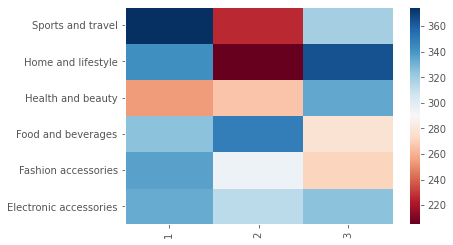

In [294]:
import numpy as np

fig, ax = plt.subplots()
im = ax.pcolor(monthly_sales_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [295]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(month_sales['Quantity'], month_sales['month'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.11008135141853503  with a P-value of P = 0.6636841799692296


<AxesSubplot:xlabel='City'>

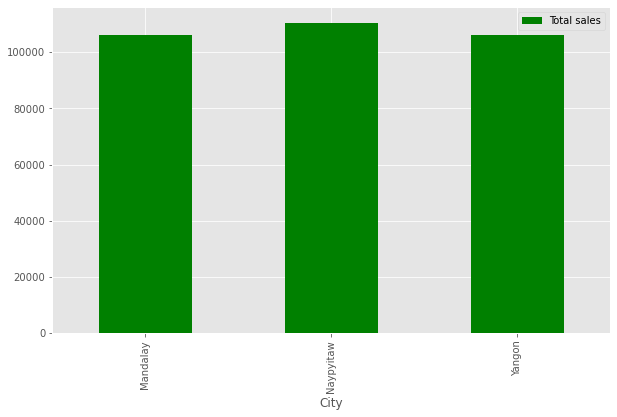

In [317]:
# finding out city sales
City_sales = sm_sales[['City', 'Total sales']].groupby(['City'], as_index=False).sum()
City_sales.plot(kind='bar', x='City', y='Total sales', figsize=(10,6), color="g")

In [318]:
city_product_sales = sm_sales[['City', 'Total sales', 'Product line']].groupby(['City','Product line'], as_index=False).sum()
city_product_sales

,City,Product line,Total sales
0,Mandalay,Electronic accessories,17051.4435
1,Mandalay,Fashion accessories,16413.3165
2,Mandalay,Food and beverages,15214.8885
3,Mandalay,Health and beauty,19980.6600
4,Mandalay,Home and lifestyle,17549.1645
5,Mandalay,Sports and travel,19988.1990
6,Naypyitaw,Electronic accessories,18968.9745
7,Naypyitaw,Fashion accessories,21560.0700
8,Naypyitaw,Food and beverages,23766.8550
9,Naypyitaw,Health and beauty,16615.3260


In [349]:
city_sales_pivot = city_product_sales.pivot(index='Product line',columns='City')
city_sales_pivot

Total sales                        
City                      Mandalay   Naypyitaw      Yangon
Product line                                              
Electronic accessories  17051.4435  18968.9745  18317.1135
Fashion accessories     16413.3165  21560.0700  16332.5085
Food and beverages      15214.8885  23766.8550  17163.1005
Health and beauty       19980.6600  16615.3260  12597.7530
Home and lifestyle      17549.1645  13895.5530  22417.1955
Sports and travel       19988.1990  15761.9280  19372.6995

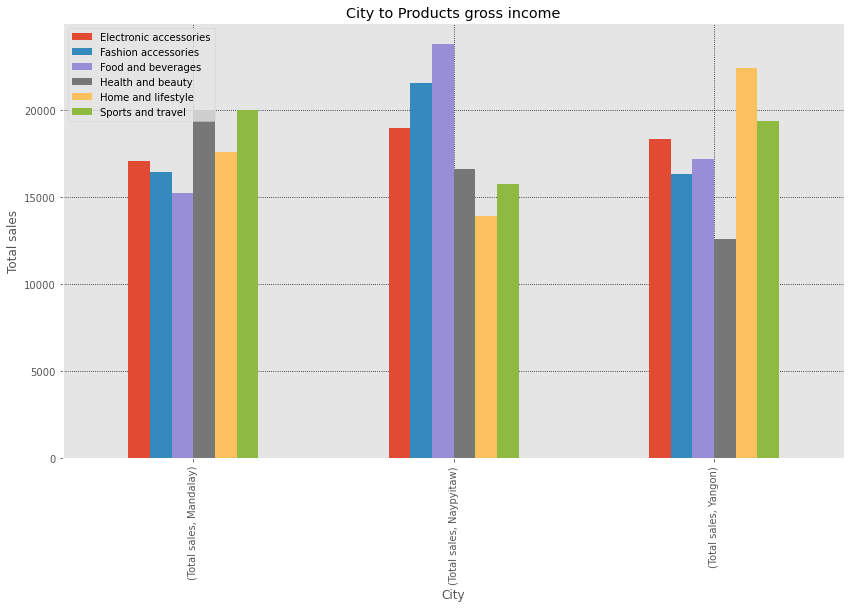

In [350]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 14,8
plt.style.use('ggplot')
city_sales_pivot.T.plot(kind='bar')
plt.grid(True, color='k', linestyle=':')
plt.ylabel('Total sales')
plt.xlabel('City')
plt.title('City to Products gross income')
plt.legend(loc=2)

In [351]:
sm_sales['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [303]:
sm_sales[['Rating', 'Product line']].groupby('Product line', as_index=False).max()

,Product line,Rating
0,Electronic accessories,10.0
1,Fashion accessories,9.9
2,Food and beverages,9.9
3,Health and beauty,10.0
4,Home and lifestyle,9.9
5,Sports and travel,10.0


In [352]:
# creating bins to categorize ratings into three categories
bins = np.linspace(min(sm_sales["Rating"]), max(sm_sales["Rating"]), 4)
group_names = ['Low', 'Medium', 'High']
sm_sales['Rating-binned'] = pd.cut(sm_sales['Rating'], bins, labels=group_names, include_lowest=True )
sm_sales[['Rating','Rating-binned']].head(10)

,Rating,Rating-binned
0,9.1,High
1,9.6,High
2,7.4,Medium
3,8.4,High
4,5.3,Low
5,4.1,Low
6,5.8,Low
7,8.0,Medium
8,7.2,Medium
9,5.9,Low


In [353]:
sm_sales['Rating-binned'].value_counts()

Medium    351
Low       341
High      308
Name: Rating-binned, dtype: int64

<AxesSubplot:>

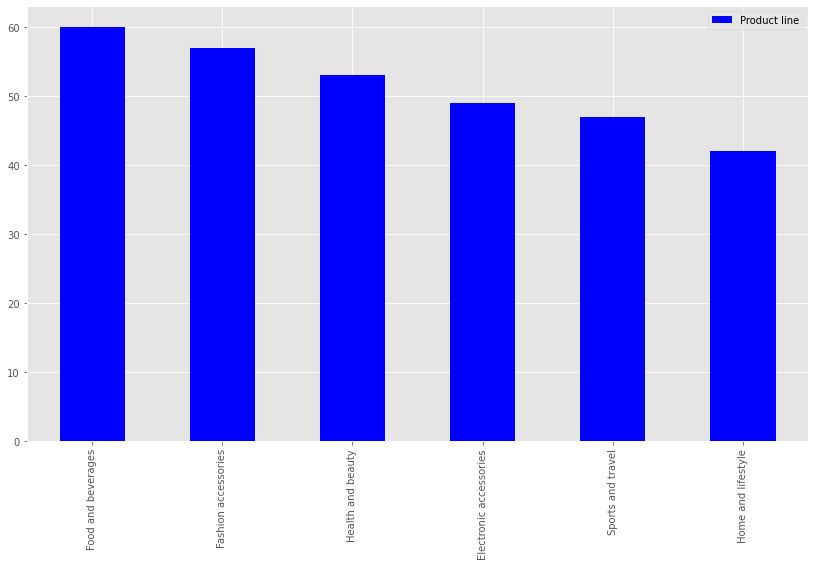

In [354]:
# Ratings are high mostly for food and fashion products
sm_sales_High = sm_sales[sm_sales['Rating-binned']=='High']
pd.DataFrame(sm_sales_High['Product line'].value_counts()).plot(kind='bar', figsize=(14,8), color='b')

In [309]:
sm_sales['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [320]:
# totals sales in relation to customer type and the city of residency 
CustomerType_sales = sm_sales[['City','Customer type', 'Total sales']].groupby(['City','Customer type' ], as_index=False).sum()
CustomerType_sales.sort_values(by=['Customer type', 'Total sales'], ascending=False)

,City,Customer type,Total sales
3,Naypyitaw,Normal,53687.4240
5,Yangon,Normal,52562.8950
1,Mandalay,Normal,52492.9860
2,Naypyitaw,Member,56881.2825
0,Mandalay,Member,53704.6860
4,Yangon,Member,53637.4755
